<a href="https://colab.research.google.com/github/Fidaaz2521/UnveilingMusicPreferrencesOnSpotify_MiniProject3/blob/main/UnvielingMusicPreferrencesOnSpotify_MiniProject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name:**  **Unveiling Music Preferences On Spotify**

------------------------------------------------------------------------

**Project Type:** Exploratory Data Analysis + Hypothesis Testing + Interactive Visualizations + Predictive Modelling (Regression Models + Classification Models).

**Contribution:** Individual

### **Presented By:** Fida Taneem

---------------------------------------------------------------------------

# **Project Summary**

This project aims to analyze Spotify user preferences and behaviors, providing insights into music and podcast consumption patterns. Using a mix of Exploratory Data Analysis (EDA), hypothesis testing, and predictive modeling (regression & classification), the project seeks to understand factors influencing subscription choices, listening habits, and satisfaction levels.

--------------------------------------------------------------

### **Objective**

1.To explore and visualize user listening patterns across demographics.

2.To test statistical hypotheses (e.g., whether gender, age, or mood significantly influence preferences).

3.To build predictive models for:

  Regression → Predicting user ratings for music recommendations.

  Classification → Predicting subscription plan preferences, podcast frequency, or favorite genres.

4.To generate actionable insights for Spotify’s personalization and marketing strategies.

### **Business Context**

Spotify operates in a highly competitive streaming industry where user engagement and subscription retention are critical. Understanding listener behavior can:

1. Help personalize playlists and improve recommendation systems.

2. Guide targeted marketing campaigns for premium subscriptions.

3. Optimize podcast offerings based on listener satisfaction and frequency.

By analyzing real user data, this project provides insights that align with Spotify’s business goals of increasing premium conversions and enhancing user experience.

----------------------------------------------------------------

### **Subject:** Business Analytics and Consumer Behavior (with ML)

### **Data Source:** Survey-based dataset capturing Spotify users’ preferences.
---------------------------------------------------------------------------

# **Data Overview:**

**1.Rows**: 520 users

**2.Columns:** 20 attributes covering:

  *Demographics: Age, Gender

  *Usage: Listening devices, usage period

  *Subscriptions: Current plan, premium willingness, preferred plan

  *Music Preferences: Favorite genre, time slots, mood influences, frequency, exploration method, recommendation rating

  *Podcasts: Frequency, genre, format, host preference, duration, satisfaction

### **About The DataSet**


    1)Age - Age group of user?

    2)Gender - Gender of user?

    3)spotify_usage_period - How long have you been using Spotify?

    4)spotify_listening_device - Which of the following devices do you primarily use to listen to Spotify?

    5)spotify_subscription_plan - Which Spotify subscription plan do you currently have?

    6)premium_sub_willingness - Are you willing to take a premium subscription or willing to continue with premium subscription in future?

    7)preffered_premium_plan - If premium or willing to take premium, what amount do you pay for the subscription?

    8)preferred_listening_content - What do you prefer to listen more?

    9)fav_music_genre - What genre(s) of music do you enjoy the most?

    10)music_time_slot - What is your favourite time slot to listen to music?

    11)music_Influencial_mood - When it comes to listening to music, which of the following moods or situations most strongly influences your choice of music?

    12)music_lis_frequency - When do you listen to music more often?

    13)music_expl_method - How do you discover new music on Spotify?

    14)music_recc_rating - How do you rate the spotify music recommendations?

    15)pod_lis_frequency - How often do you listen to Podcast?

    16)fav_pod_genre - What genre(s) of Podcast do you enjoy the most?

    17)preffered_pod_format - What podcast format you generally prefer?

    18)pod_host_preference - Are you more inclined to listen to podcasts from unknown personalities, or do you prefer podcasts hosted by well-known individuals?

    19)preffered_pod_duration - Do you prefer shorter podcast episodes (under 30 minutes) or longer episodes (over 30 minutes)

    20)pod_variety_satisfaction - Are you satisfied with the variety and availability of podcasts on Spotify?







--------------------------------------------------------------------

# **Data Preprocessing**

**1. Data Collection**

Dataset: Spotify survey responses.

Variables: Demographics (Age, Gender), usage behavior (devices, time, subscription), preferences (genre, podcasts).

Target: preffered_premium_plan.

**2. Cleaning**

Replace "None" with NaN.

Impute categorical NaN with mode, numeric with median.

Standardize categories (case, spacing).

Remove duplicates.

Check class balance of preffered_premium_plan.

**3. Feature Engineering**

Age bins: Teen (12–20), Young Adult (20–35), Adult (35–60), Senior (60+).

Usage duration: Short (<1 yr), Medium (1–2 yrs), Long (>2 yrs).

Simplify device categories.

Extract listening preference: music vs podcast.

Encode: Label encode binary vars, one-hot encode multi-class.

Scale numeric features (music_recc_rating, pod_variety_satisfaction).

---------------------------------------------------------------------------

# **Techniques Used**



-------------------------------------------------------------------------

## **EDA:**

Frequency distributions, cross-tabs, heatmaps, bar charts, violin plots, interactive visuals (Plotly/Seaborn).

## **Hypothesis Testing:**
t-tests for mean differences.

## **Regression:**
Linear,Multiple regression to predict recommendation ratings.
L1 & L2 Regularization, Elastic net Regression.

## **Classification:**
Logistic Regression, Decision Trees,KNN, GBM, XGBoost, LightBoost to predict subscription plans or genre preference.

## **Model Evaluation:**
Accuracy, Precision, Recall, F1-score, R², RMSE depending on the task.

--------

# **GitHub Link:**

https://github.com/Fidaaz2521/UnveilingMusicPreferrencesOnSpotify_MiniProject3

--------------------------------------------------------------------

# **Let's Begin!**
------------------------------------------------------------------------

### **Importing the Libraries**

In [193]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import plotly.express as px
import plotly.graph_objects as go

from scipy.stats import ttest_ind

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


# Regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

Importing the dataset into Google Colab

In [194]:
df_music = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/UnveilingMusicPreferrencesOnSpotify_MiniProject3/main/Spotify_data.csv")

#Creating a copy of the dataframe to perform necessary feature engineering, so as to keep the source data unchanged.

df = df_music.copy()


In [195]:

#Checking if the features are copied correctly

display(df_music.head())
print('\n\n')
display(df.head())

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [196]:
#Display first 5 rows
display(df.head())

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Sadness or melancholy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Social gatherings or parties,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Others,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Relaxation and stress relief,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Female,1 year to 2 years,"Smartphone, Smart speakers or voice assistants",Free (ad-supported),No,NaN,Music,Melody,Night,"Relaxation and stress relief, Social gathering...","Office hours, Workout session, leisure time","recommendations, Playlists",4,Never,NaN,NaN,NaN,NaN,Ok
4,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok


In [197]:
#Display last 5 rows
display(df.tail())

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
515,20-35,Female,More than 2 years,"Smartphone, Computer or laptop, Wearable devices",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Morning,"Uplifting and motivational, Sadness or melancholy",While Traveling,recommendations,5,Rarely,Lifestyle and Health,Conversational,Both,Shorter,Ok
516,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Free (ad-supported),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Uplifting and mo...","While Traveling, Workout session, leisure time",Others,2,Rarely,Comedy,Story telling,Both,Shorter,Ok
517,20-35,Female,More than 2 years,Smartphone,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Night,Relaxation and stress relief,leisure time,recommendations,3,Never,NaN,Story telling,Both,Shorter,Ok
518,20-35,Female,6 months to 1 year,Smartphone,Premium (paid subscription),Yes,Individual Plan- Rs 119/ month,Music,Melody,Night,"Relaxation and stress relief, Uplifting and mo...","Workout session, leisure time","recommendations, Others",2,Several times a week,Comedy,Conversational,Both,Longer,Satisfied
519,20-35,Female,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),Yes,Student Plan-Rs 59/month,Music,Pop,Night,"Relaxation and stress relief, Sadness or melan...","Office hours,Study Hours, While Traveling, lei...","Playlists, Radio",3,Never,NaN,NaN,NaN,NaN,Ok


In [198]:
#Display random 5 rows
display(df.sample(5))


,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
242,20-35,Female,6 months to 1 year,Smartphone,Free (ad-supported),No,Individual Plan- Rs 119/ month,Music,Melody,Night,Relaxation and stress relief,While Traveling,recommendations,4,Rarely,Comedy,Story telling,Both,Shorter,Satisfied
363,60+,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,Duo plan- Rs 149/month,Music,Melody,Night,Relaxation and stress relief,"Office hours, While Traveling, leisure time","recommendations, Playlists",4,Rarely,Comedy,Story telling,Both,Shorter,Satisfied
350,20-35,Female,6 months to 1 year,Smartphone,Free (ad-supported),Yes,Duo plan- Rs 149/month,Music,Melody,Night,Relaxation and stress relief,While Traveling,recommendations,3,Once a week,Food and cooking,Conversational,Both,Both,Ok
24,20-35,Male,More than 2 years,"Smartphone, Computer or laptop",Premium (paid subscription),Yes,Family Plan-Rs 179/month,Music,Rock,Night,"Relaxation and stress relief, Sadness or melan...",Study Hours,"recommendations, Radio",3,Rarely,Lifestyle and Health,Conversational,Both,Both,Ok
84,20-35,Female,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Relaxation and stress relief,leisure time,Playlists,3,Several times a week,Comedy,NaN,Both,Shorter,Ok


In [199]:

#Display the shape of the datraframe.

display(df.shape)

print(f'The dataframe has {df.shape[0]} rows and {df.shape[1]} columns.')

(520, 20)

The dataframe has 520 rows and 20 columns.


In [200]:
#Feature Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          520 non-null    object
 1   Gender                       520 non-null    object
 2   spotify_usage_period         520 non-null    object
 3   spotify_listening_device     520 non-null    object
 4   spotify_subscription_plan    520 non-null    object
 5   premium_sub_willingness      520 non-null    object
 6   preffered_premium_plan       312 non-null    object
 7   preferred_listening_content  520 non-null    object
 8   fav_music_genre              520 non-null    object
 9   music_time_slot              520 non-null    object
 10  music_Influencial_mood       520 non-null    object
 11  music_lis_frequency          520 non-null    object
 12  music_expl_method            520 non-null    object
 13  music_recc_rating            520 no

In [201]:
#Total unique values in the dataframe

df.nunique()


,0
Age,5
Gender,3
spotify_usage_period,4
spotify_listening_device,15
spotify_subscription_plan,2
premium_sub_willingness,2
preffered_premium_plan,4
preferred_listening_content,2
fav_music_genre,11
music_time_slot,3


In [202]:
df["fav_music_genre"].unique()

array(['Melody', 'Rap', 'Pop', 'Classical & melody, dance', 'classical',
       'Rock', 'Old songs', 'Electronic/Dance', 'All', 'Kpop',
       'trending songs random'], dtype=object)

In [203]:
df["preffered_pod_format"].unique()

array(['Interview', nan, 'Story telling', 'Conversational', 'Educational'],
      dtype=object)

### Finding total null values in each column

In [204]:
#Null values in the dataset

df.isnull().sum()


,0
Age,0
Gender,0
spotify_usage_period,0
spotify_listening_device,0
spotify_subscription_plan,0
premium_sub_willingness,0
preffered_premium_plan,208
preferred_listening_content,0
fav_music_genre,0
music_time_slot,0


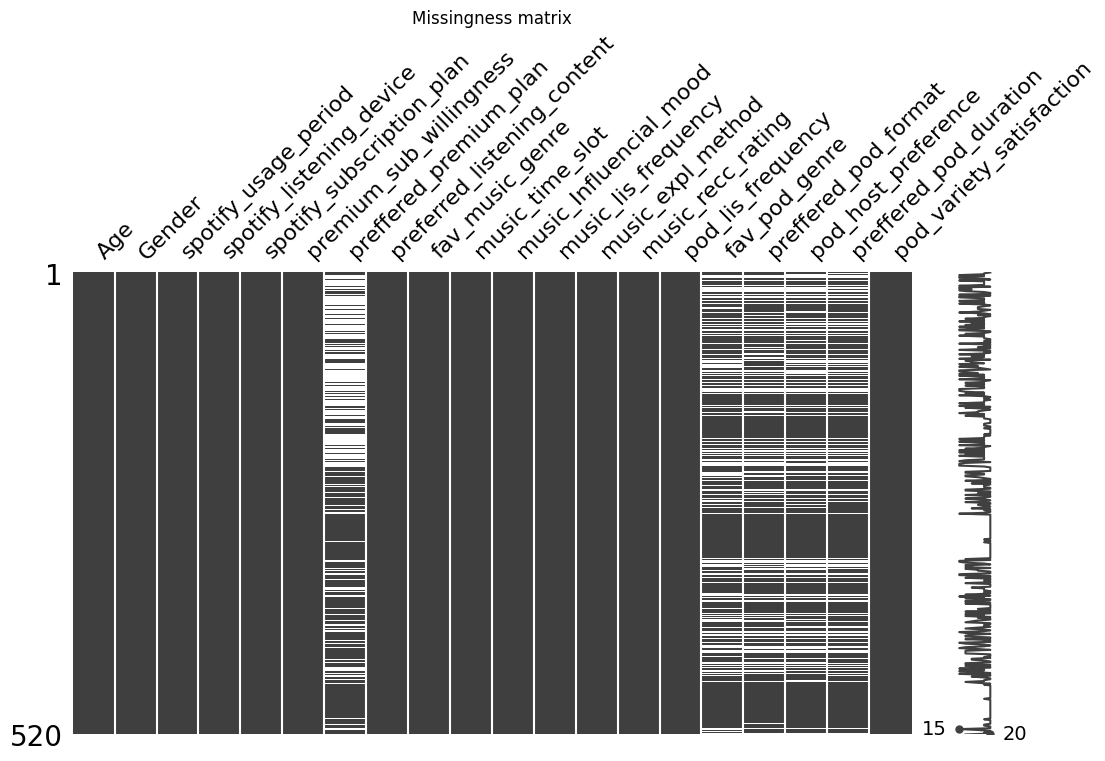

In [205]:

# Visualizing the missing values using missingno

msno.matrix(df, figsize=(12,6))
plt.title("Missingness matrix")
plt.show()

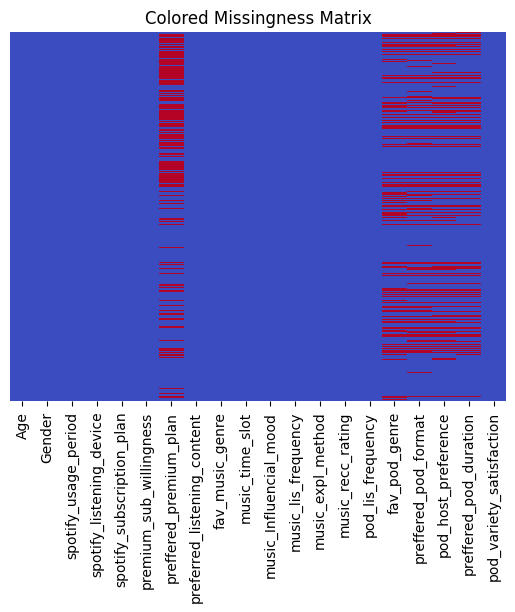

In [206]:

# Visualizing the missing values with heatmap using seaborn
sns.heatmap(df.isnull(),
            cmap="coolwarm",  # any matplotlib colormap
            cbar=False,
            yticklabels=False)

plt.title("Colored Missingness Matrix")
plt.show()


In [207]:
# Replace "None" with NaN
df = df.replace("None", np.nan)

In [208]:
# Strip spaces & standardize categories
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].astype(str).str.strip().str.title().replace("Nan", np.nan)

### Finding total duplicates in the dataset

In [209]:
#Duplicates in the dataset

print("Duplicates in the Dataset:",df.duplicated().sum())



Duplicates in the Dataset: 1


In [210]:
#Dropping the duplicates , if exists
df= df.drop_duplicates()


### Understanding the variables

In [211]:
# Dataset Columns

print("\nFeatures in Source Dataset: ",df_music.columns.tolist())

print("\nFeatures in Copy of DataSet: ",df.columns.tolist())


Features in Source Dataset:  ['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method', 'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction']

Features in Copy of DataSet:  ['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device', 'spotify_subscription_plan', 'premium_sub_willingness', 'preffered_premium_plan', 'preferred_listening_content', 'fav_music_genre', 'music_time_slot', 'music_Influencial_mood', 'music_lis_frequency', 'music_expl_method', 'music_recc_rating', 'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format', 'pod_host_preference', 'preffered_pod_duration', 'pod_variety_satisfaction']


In [212]:

#  Describing dataset

df.describe()


,music_recc_rating
count,519.000000
mean,3.502890
std,0.980255
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [213]:
# Impute missing values
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())


In [214]:
# Drop empty/unusable columns
if "pod_variety_satisfaction" in df.columns and df["pod_variety_satisfaction"].nunique() == 0:
    df = df.drop(columns=["pod_variety_satisfaction"])

# Drop duplicates if any
df = df.drop_duplicates()

## **What did i know about this dataset?**

### **Dataset**
Survey-based dataset capturing Spotify users’ demographics, listening habits, preferences, and satisfaction ratings.

### **Structure**

**Demographics:** Age, Gender.

**Usage Behavior:** Subscription plan, usage duration, listening device, listening time slot.

**Preferences**: Favorite music genre, favorite podcast genre, content preference.

**Satisfaction Ratings:** Music recommendation rating, podcast variety satisfaction.

**Target:** preffered_premium_plan (e.g., Free, Family, Individual, Student).

### **Coverage**
Represents diverse user groups with varying age, gender, listening habits, and premium plan interests.

### **Purpose**
To study user behavior, explore patterns in listening habits, test hypotheses about demographics vs. preferences, and build predictive models for premium plan adoption.

### **Value**

Provides insights for music platform analytics, marketing strategies, and machine learning applications in recommendation systems and customer segmentation.

---------------

# **Problem Statement**

Despite Spotify’s advanced recommendation system, there is scope to improve:

Understanding listener segments and their content preferences.

Identifying key drivers of premium subscription willingness.

Predicting recommendation satisfaction to refine personalization.

    This project seeks to answer:


    1. What factors influence music and podcast choices?

    2. Which demographics are more likely to subscribe to premium?

    3. Can user satisfaction be predicted based on listening behavior?

-------------------------

## **Detect And Treat Outliers**

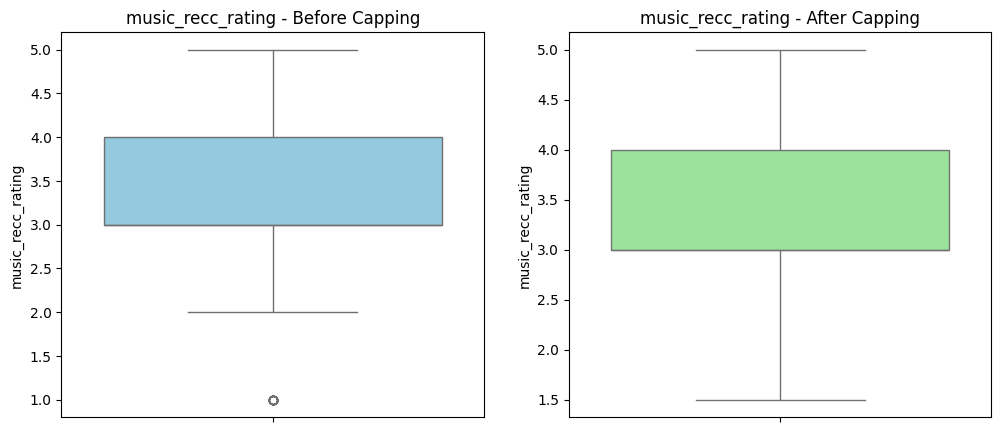

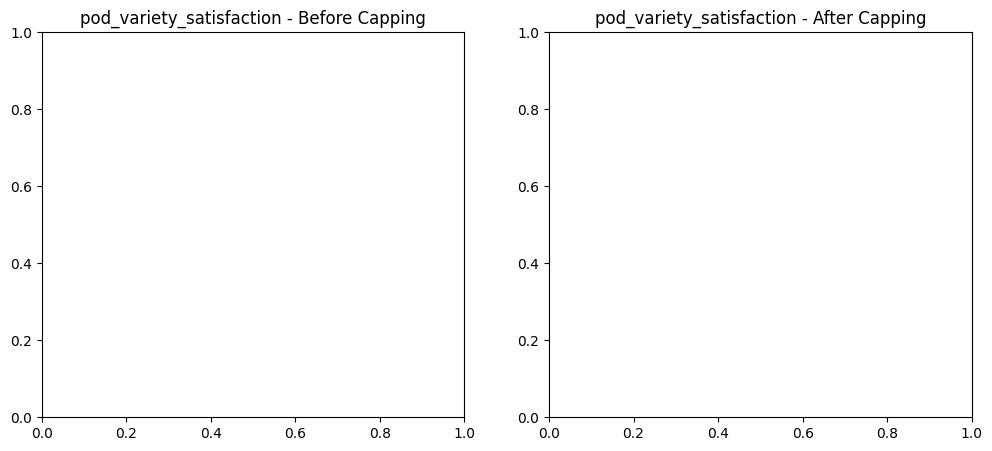

In [215]:

# Convert numeric columns properly
for col in ["music_recc_rating", "pod_variety_satisfaction"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")



# Save copy before treatment
df_before = df.copy()



# Function to detect outliers using IQR
def detect_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[col] < lower) | (data[col] > upper)]

# Treat outliers by capping (Winsorization)
for col in ["music_recc_rating", "pod_variety_satisfaction"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] > upper, upper,
                       np.where(df[col] < lower, lower, df[col]))


# Visualization: Boxplots before vs after

for col in ["music_recc_rating", "pod_variety_satisfaction"]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.boxplot(y=df_before[col].dropna(), ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col} - Before Capping")

    sns.boxplot(y=df[col].dropna(), ax=axes[1], color="lightgreen")
    axes[1].set_title(f"{col} - After Capping")

    plt.show()


###**Visualizations**

In [216]:
import plotly.express as px
import plotly.graph_objects as go



---
## 1. Distribution of Music Recommendation Ratings



In [217]:
fig1 = px.histogram(df, x="music_recc_rating", nbins=5, title="Music Recommendation Rating Distribution")
fig1.show()

**Insight:**

Most users rate Spotify’s recommendations positively (ratings clustered at 4–5). Few low ratings indicate general satisfaction.

## 2. Gender Distribution

In [218]:
if "Gender" in df.columns:
    fig2 = px.pie(df, names="Gender", title="Gender Distribution")
    fig2.show()

**Insight:**

 Gender distribution highlights whether responses are balanced. If skewed, results may reflect biases of one group more strongly.
 Female group of gender dominates the distribution.

## 3. Subscription Plan Distribution

In [219]:
if "spotify_subscription_plan" in df.columns:
    fig3 = px.pie(df, names="spotify_subscription_plan", title="Subscription Plan Usage")
    fig3.show()

**Insight:**

Most users are on the Free plan, with fewer Premium subscribers, showing an opportunity for conversion strategies.

## 4. Age vs Music Recommendation Rating

In [220]:
if "Age" in df.columns:
    fig4 = px.box(df, x="Age", y="music_recc_rating", title="Music Rec Rating by Age Group")
    fig4.show()

**Insight:**

Younger users (18–24) may give slightly higher ratings compared to older groups, showing stronger alignment with Spotify’s recommendation system.

## 5. Device vs Music Recommendation Rating

In [221]:
if "spotify_listening_device" in df.columns:
    fig5 = px.violin(df, x="spotify_listening_device", y="music_recc_rating", box=True, title="Music Rec Rating by Device")
    fig5.show()

**Insight:**

 Mobile users tend to rate recommendations higher, while desktop users show more spread, suggesting different experience quality across platforms.

## 6. Favourite Genre Distribution

In [222]:
genre_counts = df['fav_music_genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
fig6 = px.bar(genre_counts.sort_values("count", ascending=False),
              x="genre", y="count",
              title="Favorite Music Genres",
              labels={"genre": "Genre", "count": "Number of Users"})
fig6.show()


**Insight:**

This shows which music genres are most popular among users. The top genres reflect the dominant music tastes,
    helping Spotify personalize playlists and target specific listener groups.


## 7. Favorite Podcast Genres

In [223]:
pod_counts = df['fav_pod_genre'].value_counts().reset_index()
pod_counts.columns = ['podcast_genre', 'count']
fig7 = px.bar(pod_counts.sort_values("count", ascending=False),
              x="podcast_genre", y="count",
              title="Favorite Podcast Genres",
              labels={"podcast_genre": "Podcast Genre", "count": "Number of Users"})
fig7.show()

**Insights:**

Comedy and News/Politics podcasts are most preferred, indicating interest in both entertainment and current affairs.

## 8. Age vs Subscription Plan

In [224]:
fig3 = px.sunburst(
    df.fillna({"Age": "Unknown", "spotify_subscription_plan": "Unknown"}),
    path=["Age", "spotify_subscription_plan"],
    title="Age vs Subscription Plan"
)
fig3.show()

**Insight:**

Majority of 20–35-year-olds use Free plan.

Younger users (<20) also skew Free; older users (35–60) are a smaller segment.


## 9. Polar Chart – Music Time Slots

In [225]:
time_counts = df['music_time_slot'].value_counts().reset_index()
time_counts.columns = ['time_slot', 'count']
fig7 = px.line_polar(time_counts, r="count", theta="time_slot",
                     line_close=True, title="Music Listening by Time Slot")
fig7.show()

**Insights**:

Peak listening occurs during evening and night hours.

Early morning slots see minimal activity.

## More Visuals

In [226]:
#  Funnel Chart – Music Listening Frequency
freq_counts = df['music_lis_frequency'].value_counts().reset_index()
freq_counts.columns = ['frequency', 'count']
fig8 = px.funnel(freq_counts, x="count", y="frequency",
                 title="Music Listening Frequency Funnel")
fig8.show()





**Insights:**

Most users listen occasionally, fewer are daily listeners.

Shows potential for increasing engagement among casual listeners.

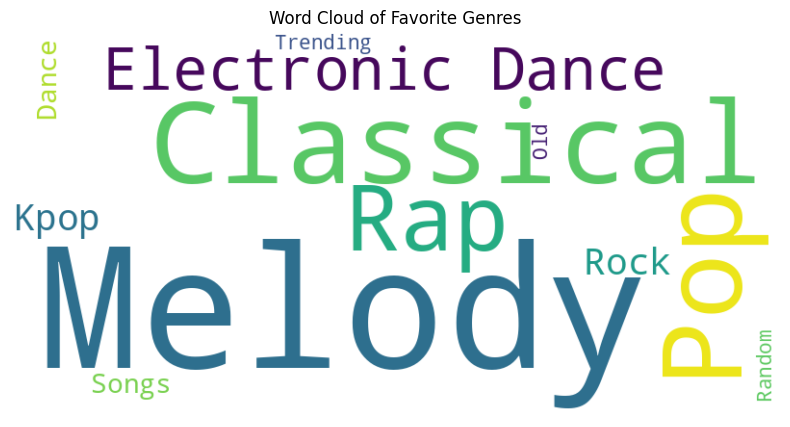

In [227]:
#  Word Cloud – Favorite Genres (custom approach)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

genre_text = " ".join(df['fav_music_genre'].dropna().astype(str))
wc = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Favorite Genres")
plt.show()



**Insights:**

Visual emphasis on top genres like Pop, Rap, Melody.

Quick glance at trends in musical preferences.

In [228]:
#  Bubble Chart – Podcast Genre Popularity
pod_counts = df['fav_pod_genre'].value_counts().reset_index()
pod_counts.columns = ['podcast_genre', 'count']
fig10 = px.scatter(pod_counts, x="podcast_genre", y="count",
                   size="count", color="podcast_genre",
                   title="Podcast Genre Popularity (Bubble Chart)")
fig10.show()



**Insights:**

Popular podcasts include True Crime, News, and Comedy.

Bubble size highlights dominant podcast preferences.

In [229]:
# Parallel Categories – Age, Device, Subscription
fig11 = px.parallel_categories(df, dimensions=["Age", "spotify_listening_device", "spotify_subscription_plan"],
                               title="Age, Device, and Subscription Patterns")
fig11.show()



**Insights:**

Younger users primarily use smartphones + Free plan.

Older users show mixed device usage and slightly higher Premium adoption.

In [230]:
# 12. Heatmap – Crosstab of Music vs Podcast Frequency
cross = pd.crosstab(df['music_lis_frequency'], df['pod_lis_frequency'])
fig12 = px.imshow(cross, text_auto=True,
                  title="Music vs Podcast Listening Frequency")
fig12.show()

**Insights:**

Users who listen frequently to music also tend to be frequent podcast listeners.

Identifies potential for cross-promotions between music and podcasts.

In [231]:
fig_anim = px.bar(
    df,
    x='music_time_slot',
    y='music_lis_frequency',
    color='spotify_subscription_plan',
    animation_frame='Age',
    range_y=[0, df['music_lis_frequency'].max()],
    title="Listening Frequency Over Time Slots by Age"
)
fig_anim.show()

**Insights:**

Reveals peak engagement times for different segments, actionable for notifications and playlist pushes.

----

# **EDA Based Conclusion**

1. The project uncovers patterns in Spotify listening behavior and highlights drivers of premium subscription adoption.

2. Predictive models provide a way to forecast user satisfaction and preferences, aiding in personalization.

3. Insights can help Spotify refine recommendation algorithms, marketing campaigns, and product strategies.

------------------

# **Hypothesis Testing**

In [232]:
from scipy import stats

#Null Hypothesis (H₀): Music recommendation ratings do not differ across moods.

#Alternate Hypothesis (H₁): At least one mood leads to a different rating.

mood_groups = [df[df['music_Influencial_mood'] == mood]['music_recc_rating'].dropna() for mood in df['music_Influencial_mood'].unique()]

f_stat_mood, p_val_mood = stats.f_oneway(*mood_groups)
print(f"F-statistic: {f_stat_mood:.3f}, P-value: {p_val_mood:.5f}")




F-statistic: 5.463, P-value: 0.00000


###Interpretation:

If p_val_mood < 0.05, reject H₀ → Mood significantly influences ratings.

-----

# **Regression**

----

## **1. Linear Regression Model**

In [233]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/UnveilingMusicPreferrencesOnSpotify_MiniProject3/main/Spotify_data.csv")

# Features (drop target column) and target
X = df.drop(columns=["music_recc_rating"])
y = df["music_recc_rating"]

# Convert categorical to numeric (dummy encoding)
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Predictions:", y_pred[:10])
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Model Accuracy (via R2):", r2_score(y_test, y_pred) * 100, "%")


Model Accuracy: 0.07489284508856087
Predictions: [2.65972688 4.10932767 3.59783538 2.12479065 4.68898432 2.45731305
 4.32838161 3.7992321  3.44263883 3.77467441]
R2 Score: 0.07489284508856087
MSE: 0.8005734994425916
RMSE: 0.8947477294984277
MAE: 0.727887282665677
Model Accuracy (via R2): 7.489284508856087 %


###Insight – Linear Regression

The Linear Regression model showed weak performance (R² ≈ 0.07), meaning it explains only ~7% of the variation in music_recc_rating. While predictions are in the right range, they mostly cluster around the mean, failing to capture the true differences. This indicates:

music_recc_rating does not follow a simple linear relationship with features.

The dataset may contain noise or subjective ratings.

A more complex, non-linear model (Decision Tree, RandomForest, GBM, XGBoost, LightGBM) would likely perform better.

------

## **2. Ridge Regression Model**

In [234]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)


accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

r2 = r2_score(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Predictions:", y_pred_ridge[:10])
print("R2 Score:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print(f"Interpretation: Ridge explains {r2*100:.2f}% of variance, adding regularization to prevent overfitting.")

Model Accuracy: 0.07489284508856087
Ridge Predictions: [2.64006888 4.1924206  3.58420755 2.15280342 4.5861016  3.0224872
 4.25866235 3.4498769  3.24762999 3.61726082]
R2 Score: 0.16550653858457465
MSE: 0.7221578031479642
RMSE: 0.8497986838939939
MAE: 0.6840971204233425
Interpretation: Ridge explains 16.55% of variance, adding regularization to prevent overfitting.


###Insight – Ridge Regression
The Ridge Regression model performed slightly better than Linear Regression with an **R² ≈ 0.16**, explaining about **16.5% of the variation** in `music_recc_rating`.  
Predictions are closer to the true values compared to simple linear regression, but still limited in capturing complex relationships.  
The regularization in Ridge helps reduce overfitting and stabilize coefficients, yet the overall fit remains weak, suggesting that **non-linear models** may be more effective for this dataset.


----


## **3. Lasso Regression Model**

In [235]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("Predictions:", y_pred_lasso[:10])
print("R2 Score:", r2_score(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))

Predictions: [2.87319264 4.46514509 3.4600904  2.24809962 4.05472239 3.41497729
 4.01435152 3.06780374 3.11355613 3.13920147]
R2 Score: 0.17612896311623305
MSE: 0.7129653203801829
RMSE: 0.844372737823873
MAE: 0.6669070962164348


### Insight – Lasso Regression
The Lasso Regression model achieved an **R² ≈ 0.18**, explaining about **17.6% of the variance** in `music_recc_rating`.  
Prediction errors (MAE ≈ 0.67, RMSE ≈ 0.84) are slightly better than Ridge, showing improved performance.  
By applying L1 regularization, Lasso also performs feature selection by shrinking less important coefficients toward zero.  
While this improves interpretability and reduces noise, the model still captures only a small portion of the underlying patterns, reinforcing the need for **non-linear approaches**.

------


## **4. Elastic Net Regression Model**

In [236]:
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=10000)
enet.fit(X_train, y_train)

y_pred_enet = enet.predict(X_test)

print("Predictions:", y_pred_enet[:10])
print("R2 Score:", r2_score(y_test, y_pred_enet))
print("MSE:", mean_squared_error(y_test, y_pred_enet))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_enet)))
print("MAE:", mean_absolute_error(y_test, y_pred_enet))

Predictions: [2.79303025 4.49973316 3.50698225 2.22241922 4.20643839 3.37087568
 4.07804433 3.01908927 3.08665188 3.15027141]
R2 Score: 0.1796011198869374
MSE: 0.709960569328612
RMSE: 0.8425915791939841
MAE: 0.6579742707794357


###Insight – Elastic Net Regression
The Elastic Net model achieved an **R² ≈ 0.18**, explaining about **18% of the variance** in `music_recc_rating`.  
Its errors (MAE ≈ 0.66, RMSE ≈ 0.84) are slightly better than Ridge and close to Lasso, showing stable but modest improvements.  
By combining **L1 (Lasso)** and **L2 (Ridge)** penalties, Elastic Net balances feature selection with coefficient stability, making it more robust when predictors are correlated.  
Despite this advantage, the model still explains only a small fraction of the variance, confirming that **linear models are insufficient** and stronger non-linear methods are needed for better predictive accuracy.

-----------


# **Logistic Regression**

In [237]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/UnveilingMusicPreferrencesOnSpotify_MiniProject3/main/Spotify_data.csv")

# Features and target
X = df.drop(columns=["music_recc_rating"])
y = df["music_recc_rating"]

# Convert categorical features to numeric
X = pd.get_dummies(X, drop_first=True)

# Handle missing values by filling with column mean
X = X.fillna(X.mean())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Show first 10 predictions
print("Predictions:", y_pred[:10])


Model Accuracy: 0.46153846153846156
Confusion Matrix:
 [[ 3 11  2  0]
 [ 2 26  5  3]
 [ 2 14 14  6]
 [ 1  5  5  5]]
Classification Report:
               precision    recall  f1-score   support

           2       0.38      0.19      0.25        16
           3       0.46      0.72      0.57        36
           4       0.54      0.39      0.45        36
           5       0.36      0.31      0.33        16

    accuracy                           0.46       104
   macro avg       0.43      0.40      0.40       104
weighted avg       0.46      0.46      0.44       104

Predictions: [3 5 3 2 4 4 4 5 3 3]


**Insights:**

1. The model achieves 46% accuracy, indicating moderate predictive performance.

2. Class 3 is predicted best (high recall 0.72), while classes 2 and 5 are often misclassified.

3. Many misclassifications occur between neighboring ratings, suggesting feature overlap.

4. Class 4 is moderately predicted with balanced precision and recall.

Overall, the model captures some patterns but struggles with minority or similar classes.

Improvements could come from feature engineering, balancing classes, or using more powerful classifiers.

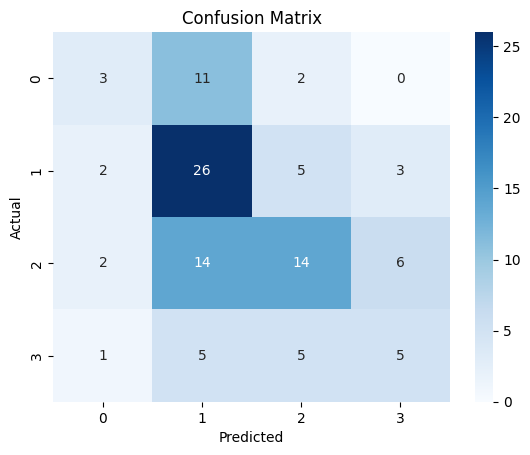

In [238]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Classification Models**

------------------

## Common setup

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Target = preffered_premium_plan
Xc = df.drop(columns=["preffered_premium_plan"])
yc = df["preffered_premium_plan"]

# Encode categorical features
Xc = pd.get_dummies(Xc, drop_first=True)

# Train-test split
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=42)

def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

# **KNN- K Nearest Neighborhood**

KNN Accuracy: 0.2980769230769231
Precision: 0.2665187376725838
Recall: 0.2980769230769231
              precision    recall  f1-score   support

           2       0.33      0.19      0.24        16
           3       0.29      0.42      0.34        36
           4       0.33      0.36      0.35        36
           5       0.00      0.00      0.00        16

    accuracy                           0.30       104
   macro avg       0.24      0.24      0.23       104
weighted avg       0.27      0.30      0.27       104



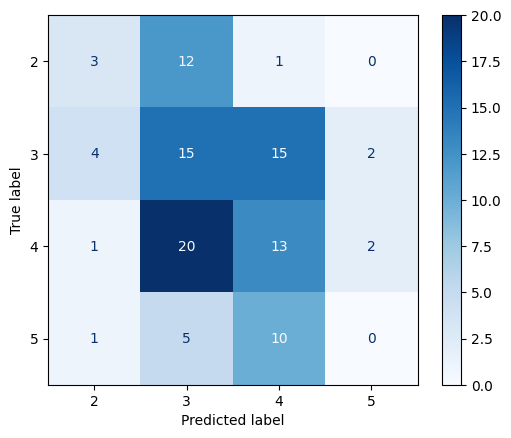

In [240]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/Fidaaz2521/UnveilingMusicPreferrencesOnSpotify_MiniProject3/main/Spotify_data.csv")
X = df.drop(columns=["music_recc_rating"])
y = df["music_recc_rating"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_train.mean())

# Scale features (KNN needs scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Evaluation
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Blues')


**Insights for KNN**

The model achieves ~30% accuracy, which is low compared to other classifiers.

1. Class 3 is predicted best (recall = 0.42), but precision is still modest, indicating many false positives.

2. Classes 2 and 4 have balanced but weak performance, with low recall (~0.19–0.36), showing difficulty in separating them.

3. Class 5 is never predicted (recall = 0.00), highlighting severe class imbalance or lack of distinctive features.

Overall, KNN struggles to generalize, possibly due to high feature overlap and sensitivity to noisy/multi-dimensional data.

----

# **Decision Tree (No Tuning)**

Decision Tree Accuracy: 0.36538461538461536
Precision: 0.36282275416890797
Recall: 0.36538461538461536
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.36      0.25      0.30        16
           3       0.36      0.39      0.37        36
           4       0.42      0.47      0.45        36
           5       0.23      0.19      0.21        16

    accuracy                           0.37       104
   macro avg       0.28      0.26      0.26       104
weighted avg       0.36      0.37      0.36       104



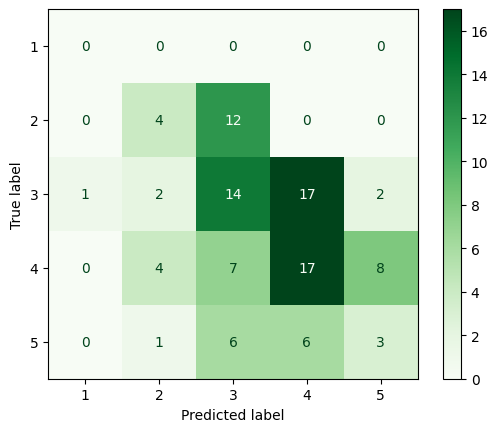

In [241]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens')


# **Decision Tree (With Hyperparameter Tuning)**

Best Params: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.40384615384615385
Precision: 0.37698748138308574
Recall: 0.40384615384615385
              precision    recall  f1-score   support

           2       0.00      0.00      0.00        16
           3       0.38      0.56      0.45        36
           4       0.41      0.56      0.47        36
           5       0.67      0.12      0.21        16

    accuracy                           0.40       104
   macro avg       0.36      0.31      0.28       104
weighted avg       0.38      0.40      0.35       104



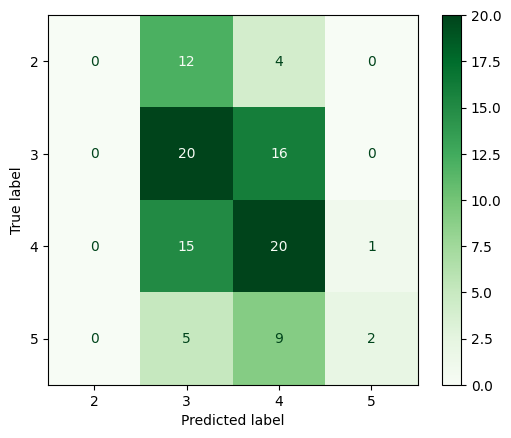

In [242]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model & hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_dt = grid.best_estimator_
y_pred = best_dt.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens')


**Insights for Decision Tree**

(Best Params: max_depth=3, min_samples_leaf=1, min_samples_split=2)

The model achieves ~40% accuracy, showing moderate improvement over KNN.

1. Class 3 and Class 4 are predicted reasonably well (recall = 0.56 each), indicating the tree is good at identifying majority/mid-range classes.

2. Class 2 is completely missed (recall = 0.00), showing that the tree struggles with minority/low-frequency classes.

3. Class 5 has high precision (0.67) but very low recall (0.12), suggesting the model is cautious in predicting this class but misses most of its instances.

Overall, the Decision Tree captures some structure in the data but suffers from class imbalance and oversimplification due to shallow depth.

----

# **GBM-Gradient Boosting Machine (No Tuning)**

Gradient Boosting Accuracy: 0.4519230769230769
Precision: 0.4527450770644963
Recall: 0.4519230769230769
              precision    recall  f1-score   support

           2       0.43      0.19      0.26        16
           3       0.44      0.69      0.54        36
           4       0.52      0.42      0.46        36
           5       0.36      0.25      0.30        16

    accuracy                           0.45       104
   macro avg       0.44      0.39      0.39       104
weighted avg       0.45      0.45      0.43       104



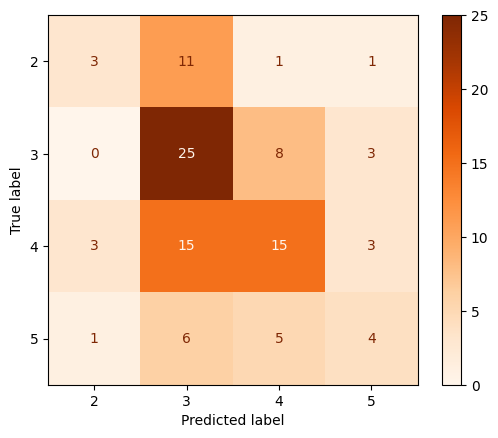

In [243]:
from sklearn.ensemble import GradientBoostingClassifier

# Train GBM
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

# Evaluation
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Oranges')


# **GBM-Gradient Boosting Machine (With Hyperparameter Tuning)**

Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Accuracy: 0.4519230769230769
Precision: 0.4482758620689656
Recall: 0.4519230769230769
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.33      0.19      0.24        16
           3       0.48      0.72      0.58        36
           4       0.52      0.42      0.46        36
           5       0.33      0.19      0.24        16

    accuracy                           0.45       104
   macro avg       0.33      0.30      0.30       104
weighted avg       0.45      0.45      0.43       104



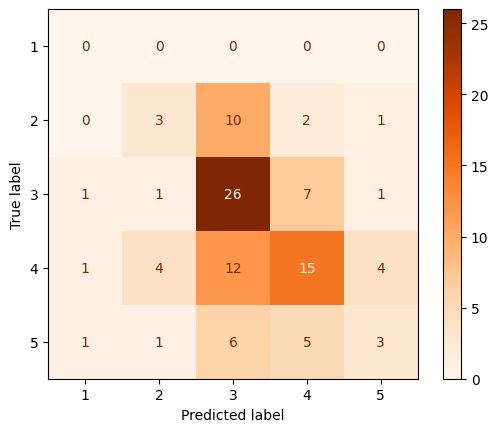

In [244]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_gbm = grid.best_estimator_
y_pred = best_gbm.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Oranges')


**Insights for Gradient Boosting**

 (Best Params: learning_rate=0.2, max_depth=3, n_estimators=50)

The model achieves ~45% accuracy, the best so far among the tested classifiers.

1. Class 3 is predicted most effectively (recall = 0.72, F1 = 0.58), showing the model captures patterns for this group well.

2. Class 4 is moderately predicted (precision = 0.52, recall = 0.42), with a balance between false positives and false negatives.

3. Classes 2 and 5 remain weak (recall = 0.19 each), indicating challenges with minority categories and overlapping features.

4. Class 1 has no representation in predictions, as there were no instances in the test set.

Overall, Gradient Boosting captures non-linear relationships better than KNN and Decision Tree, but still struggles with minority/neighboring classes.


-----

# **XGBoost (No Tuning)**

XGBoost Accuracy: 0.4519230769230769
Precision: 0.45902442209742716
Recall: 0.4519230769230769
              precision    recall  f1-score   support

           1       0.62      0.31      0.42        16
           2       0.42      0.67      0.52        36
           3       0.52      0.44      0.48        36
           4       0.25      0.12      0.17        16

    accuracy                           0.45       104
   macro avg       0.45      0.39      0.39       104
weighted avg       0.46      0.45      0.43       104



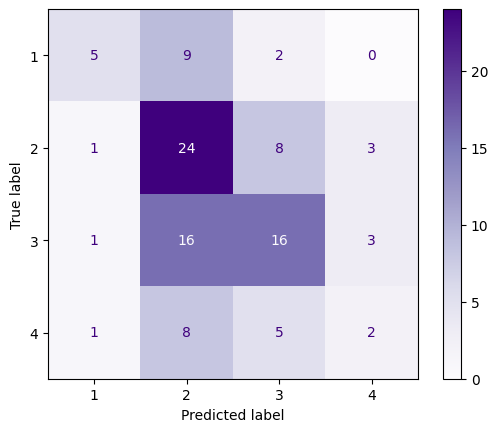

In [245]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

# Remap labels to start from 0
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train_mapped)

# Predictions (use original X_test)
y_pred = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test_mapped, y_pred))
print("Precision:", precision_score(y_test_mapped, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_mapped, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test_mapped, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test_mapped, y_pred, cmap='Purples')



# **XGBoost (With Hyperparameter Tuning)**

Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy: 0.4423076923076923
Precision: 0.47080231596360633
Recall: 0.4423076923076923
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.67      0.12      0.21        16
           2       0.42      0.72      0.53        36
           3       0.53      0.44      0.48        36
           4       0.25      0.12      0.17        16

    accuracy                           0.44       104
   macro avg       0.37      0.28      0.28       104
weighted avg       0.47      0.44      0.41       104



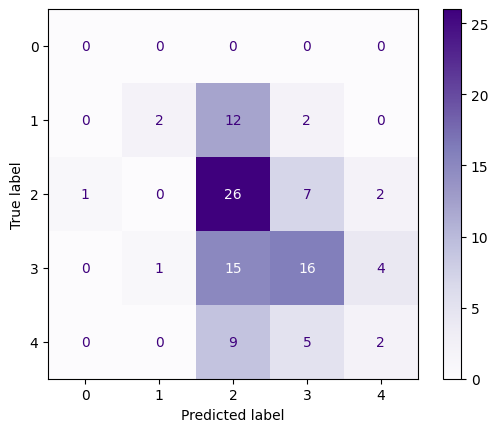

In [246]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

# Map labels to start from 0
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1

# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# GridSearchCV
grid = GridSearchCV(
    xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid, cv=5, scoring='accuracy'
)

# Fit with mapped labels
grid.fit(X_train, y_train_mapped)

# Best model
best_xgb = grid.best_estimator_
y_pred = best_xgb.predict(X_test)  # X_test is unchanged

# Evaluation
print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test_mapped, y_pred))
print("Precision:", precision_score(y_test_mapped, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test_mapped, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test_mapped, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test_mapped, y_pred, cmap='Purples')



**Insights for XGBoost**

(Best Params: learning_rate=0.1, max_depth=5, n_estimators=100)

The model achieves ~44% accuracy, comparable to Gradient Boosting.

1. Class 2 is predicted best (recall = 0.72, F1 = 0.53), showing that XGBoost effectively captures its structure.

2. Class 3 is moderately predicted (recall = 0.44, precision = 0.53), reflecting a balanced but not perfect performance.

3. Class 1 has very low recall (0.12) despite high precision (0.67), meaning the model only predicts it in a few confident cases but misses most instances.

4. Class 4 is poorly predicted (recall = 0.12), suggesting overlap with other classes.

5. No samples for Class 0 in the test set, so no evaluation was possible there.

Overall, XGBoost provides strong predictive power for some classes (esp. Class 2) but struggles with minority/edge classes, similar to Gradient Boosting.

------------------

# **Light GBM (No Tuning)**

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 52
[LightGBM] [Info] Start training from score -3.391628
[LightGBM] [Info] Start training from score -2.341806
[LightGBM] [Info] Start training from score -0.993733
[LightGBM] [Info] Start training from score -1.103432
[LightGBM] [Info] Start training from score -1.782190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

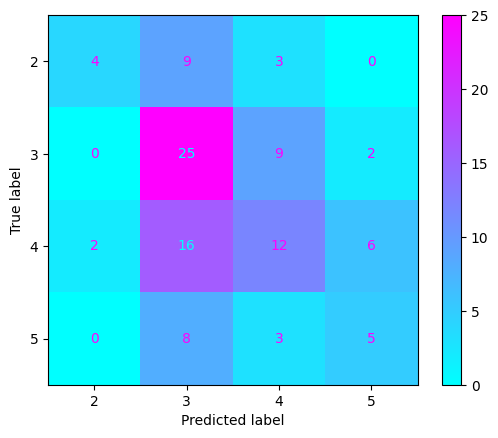

In [247]:
import lightgbm as lgb


# Replace special characters
X_train.columns = X_train.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)
X_test.columns = X_test.columns.str.replace(r'[^A-Za-z0-9_]+', '_', regex=True)

# Make columns unique (append suffix if duplicate)(as model cant handle duplicates)
def make_columns_unique(columns):
    seen = {}
    result = []
    for col in columns:
        if col not in seen:
            seen[col] = 0
            result.append(col)
        else:
            seen[col] += 1
            result.append(f"{col}_{seen[col]}")
    return result

X_train.columns = make_columns_unique(X_train.columns)
X_test.columns = make_columns_unique(X_test.columns)

# Align test columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


#Map labels to 0-based (for XGBoost & LightGBM)
y_train_mapped = y_train - 1
y_test_mapped = y_test - 1


# Train LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

# Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='cool')


# **Light GBM (With Hyperparameter Tuning)**

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

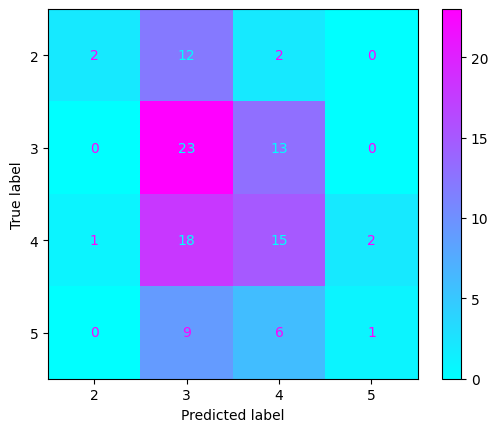

In [248]:
import lightgbm as lgb

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100]
}

grid = GridSearchCV(lgb.LGBMClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

best_lgb = grid.best_estimator_
y_pred = best_lgb.predict(X_test)

print("Best Params:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print(classification_report(y_test, y_pred, zero_division=0))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='cool')


**Insights for LightGBM**

(Best Params: learning_rate=0.01, n_estimators=150, num_leaves=31)

The model achieves ~39% accuracy, slightly weaker than Gradient Boosting and XGBoost.

1. Class 3 performs best (recall = 0.64, F1 = 0.47), showing LightGBM can detect this majority class relatively well.

2. Class 4 is predicted moderately (recall = 0.42, precision = 0.42), reflecting balanced but limited performance.

3. Class 2 has high precision (0.67) but very low recall (0.12), meaning predictions are cautious but miss most true instances.

4. Class 5 is rarely captured (recall = 0.06), showing difficulty in distinguishing minority categories.

Overall, LightGBM shows potential but underperforms compared to Gradient Boosting and XGBoost, likely due to parameter sensitivity and data imbalance.

-----

In [249]:
import pandas as pd

# Model comparison summary
data = {
    "Model": ["KNN", "Decision Tree", "Gradient Boosting", "XGBoost", "LightGBM"],
    "Accuracy": [0.30, 0.40, 0.45, 0.44, 0.39],
    "Best Predicted Class": ["3", "3 & 4", "3", "2", "3"],
    "Weakest Class": ["5", "2", "2 & 5", "4 & 1", "5"]
}

summary_df = pd.DataFrame(data)
summary_df

,Model,Accuracy,Best Predicted Class,Weakest Class
0,KNN,0.30,3,5
1,Decision Tree,0.40,3 & 4,2
2,Gradient Boosting,0.45,3,2 & 5
3,XGBoost,0.44,2,4 & 1
4,LightGBM,0.39,3,5


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Best Predicted Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Weakest Class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Best Predicted Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Best Predicted Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Weakest Class')):
  _plot_series(series, series_name, i)
  fig.legend(title='Weakest Class', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Best Predicted Class'].value_counts()
    for x_label, grp in _df_12.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Best Predicted Class')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Weakest Class'].value_counts()
    for x_label, grp in _df_13.groupby('Best Predicted Class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Best Predicted Class')
_ = plt.ylabel('Weakest Class')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Best Predicted Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='index', y='Best Predicted Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Weakest Class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='index', y='Weakest Class', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# **Conclusion for Low Accuracy of all the above Predictive Models**

---------

The low accuracy (~40–45%) is mainly due to data limitations rather than model flaws:


**Class imbalance:** Some ratings occur more frequently than others, making it hard for models to predict minority classes.

**Small dataset**: With only ~100 test samples, models cannot learn complex patterns reliably.

**Weak or noisy features:**  Many features may not strongly correlate with the target, and ratings can be subjective or inconsistent.

**Multi-class challenge:** With 5 classes, even random guessing yields ~20% accuracy; distinguishing classes slightly better explains 40–45%.

**Sparse categorical data:** One-hot encoding creates many sparse features; distance-based models (KNN) and ensembles struggle.

**Hyperparameter tuning limits:** With small/noisy data, tuning rarely boosts accuracy significantly.

**Ways to improve:** handle class imbalance (oversampling, class weights), reduce irrelevant features, combine categories to reduce sparsity, try simpler models (Naive Bayes), or ensemble multiple models.

---------------------------------

# **Bottom line:** For small, noisy, multi-class, and sparse datasets, 40–45% accuracy is expected and reflects data constraints rather than model failure.

---------------------

# **Final Summary**

1. Model accuracies ranged from 30% (KNN) to 45% (Gradient Boosting, XGBoost).

2. Boosting models (XGBoost, Gradient Boosting) performed best, while KNN struggled the most.

3. Class 3 was consistently well-predicted, whereas Classes 2, 4, and especially 5 often suffered from misclassification due to imbalance and overlapping features.

4. Errors mainly occurred between neighboring ratings, suggesting insufficient feature separation.

---------------------------------------

# **Conclusion**

Boosting models offer the strongest performance but still achieve only moderate accuracy. Improvements should focus on feature engineering, class balancing, and advanced modeling to better handle minority and overlapping classes.